In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import os, joblib
from sklearn.datasets import load_iris

OUTDIR = "figures"
os.makedirs(OUTDIR, exist_ok=True)

In [19]:
# Load dataset
data = pd.read_csv("IRIS.csv")

# Display first few rows
print(data.head())


   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [20]:
X = data.drop('species', axis=1)  # features
y = data['species']               # target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [21]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


Accuracy: 0.9666666666666667

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



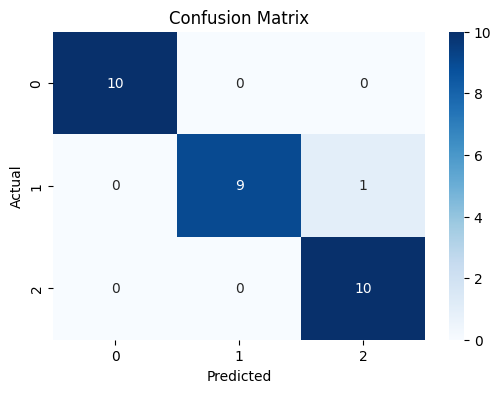

In [22]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix visualization
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


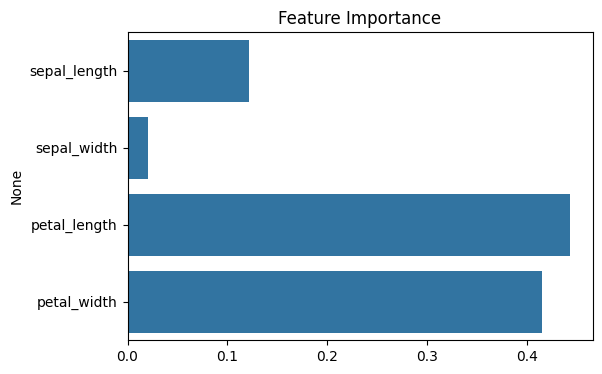

In [8]:
importances = model.feature_importances_
features = data.columns[:-1]

plt.figure(figsize=(6,4))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.show()


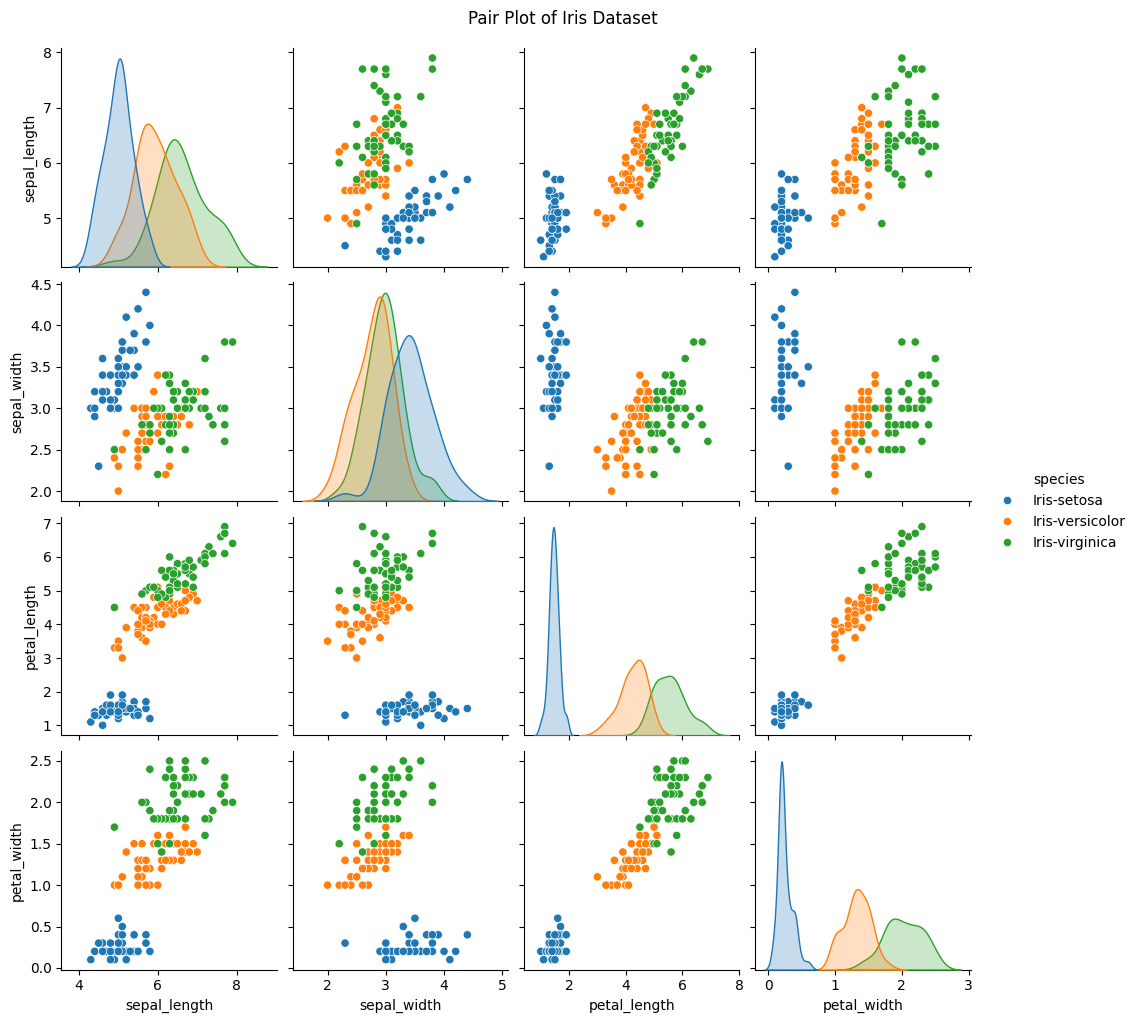

In [23]:
sns.pairplot(data, hue="species", diag_kind="kde")
plt.suptitle("Pair Plot of Iris Dataset", y=1.02)
plt.show()


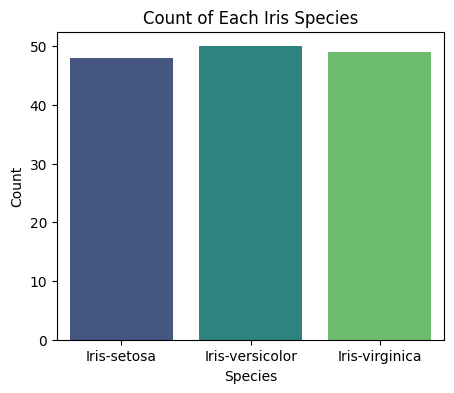

In [33]:
plt.figure(figsize=(5,4))
sns.countplot(x="species", data=data, hue="species", legend=False, palette="viridis")
plt.title("Count of Each Iris Species")
plt.xlabel("Species")
plt.ylabel("Count")
plt.show()

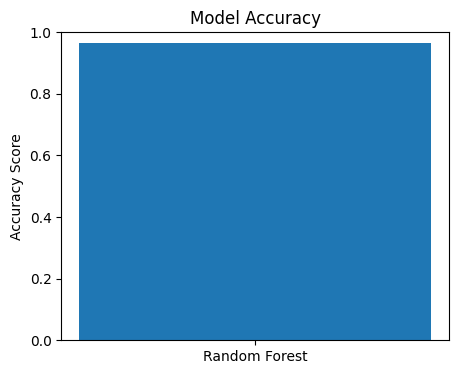

In [27]:
accuracy = accuracy_score(y_test, y_pred)

plt.figure(figsize=(5,4))
plt.bar(["Random Forest"], [accuracy])
plt.ylim(0,1)
plt.title("Model Accuracy")
plt.ylabel("Accuracy Score")
plt.show()

In [32]:
# --- train ---
X = df[FEATURES].values; y = df["species"].values
Xtr, Xte, ytr, yte = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
scaler = StandardScaler().fit(Xtr)
Xtr_s, Xte_s = scaler.transform(Xtr), scaler.transform(Xte)
model = RandomForestClassifier(n_estimators=100, random_state=42).fit(Xtr_s, ytr)
yhat = model.predict(Xte_s)
acc = accuracy_score(yte, yhat); cm = confusion_matrix(yte, yhat, labels=classes)
report = classification_report(yte, yhat, output_dict=True, zero_division=0)

# --- save small individual figs ---
# 1) Confusion matrix
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=classes, yticklabels=classes, cmap="Blues")
plt.title("Confusion Matrix"); plt.xlabel("Predicted"); plt.ylabel("Actual")
plt.tight_layout(); plt.savefig(f"{OUTDIR}/confusion_matrix.png", dpi=150); plt.close()

# 2) Feature importances
imp = model.feature_importances_; idx = np.argsort(imp)
plt.figure(figsize=(4,3))
plt.barh([FEATURES[i] for i in idx], imp[idx]); plt.title("Feature importances")
plt.tight_layout(); plt.savefig(f"{OUTDIR}/feature_importance.png", dpi=150); plt.close()

# 3) Accuracy bar
plt.figure(figsize=(3,3)); plt.bar(["RandomForest"], [acc]); plt.ylim(0,1)
plt.title("Accuracy"); plt.text(0,acc+0.01,f"{acc:.3f}",ha="center")
plt.tight_layout(); plt.savefig(f"{OUTDIR}/accuracy.png", dpi=150); plt.close()

# --- combined dashboard (single image) ---
fig = plt.figure(figsize=(12,6))
gs = fig.add_gridspec(2,4, wspace=0.5, hspace=0.5)

ax0 = fig.add_subplot(gs[0,0]); ax0.bar(["Accuracy"],[acc]); ax0.set_ylim(0,1); ax0.set_title("Overall Accuracy")
ax1 = fig.add_subplot(gs[0,1:3]); sns.heatmap(cm, annot=True, fmt='d', xticklabels=classes, yticklabels=classes, cmap="Blues", ax=ax1); ax1.set_title("Confusion Matrix")
ax2 = fig.add_subplot(gs[0,3]); ax2.barh([FEATURES[i] for i in idx], imp[idx]); ax2.set_title("Feature Importances")
ax3 = fig.add_subplot(gs[1,0]); sns.boxplot(x="species", y="sepal_length", data=df, ax=ax3); ax3.set_title("sepal_length by species")
ax4 = fig.add_subplot(gs[1,1]); sns.boxplot(x="species", y="sepal_width", data=df, ax=ax4); ax4.set_title("sepal_width by species")
ax5 = fig.add_subplot(gs[1,2]); sns.boxplot(x="species", y="petal_length", data=df, ax=ax5); ax5.set_title("petal_length by species")
ax6 = fig.add_subplot(gs[1,3]); sns.boxplot(x="species", y="petal_width", data=df, ax=ax6); ax6.set_title("petal_width by species")

plt.suptitle("Iris Classification Dashboard (compact)")
fig.subplots_adjust(left=0.05, right=0.98, top=0.92, bottom=0.07, wspace=0.4, hspace=0.6)
fig.savefig(f"{OUTDIR}/combined_dashboard.png", dpi=150)
plt.close(fig)

# --- save model & artifacts ---
joblib.dump(model, f"{OUTDIR}/model_randomforest.pkl")
joblib.dump(scaler, f"{OUTDIR}/scaler.pkl")
pd.DataFrame(report).transpose().to_csv(f"{OUTDIR}/classification_report.csv")

print(f"Saved images and models to ./{OUTDIR}/")


Saved images and models to ./figures/
